<a href="https://colab.research.google.com/github/TairikJohnny/API-6-SEMESTRE-DOCUMENTACAO/blob/main/api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando o pandas
import pandas as pd
import numpy as np

!pip install matplotlib==3.5.0

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Folha de estilo FiveThirtyEight
plt.rcParams['lines.linewidth'] = 1.5 # Configuração da largura de linha
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Instalando as bibliotecas Skforecast (previsão de séries temporais)
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Lendo o CSV, setando o separador padrão para virgula e convertendo os campos que contém data para o tipo data
dados = pd.read_csv('/content/drive/MyDrive/FATEC - BANCO DE DADOS/6° SEMESTRE/API/h_m_r_silver11.csv', sep=";", parse_dates=['dt_competencia','competencia'])

# Dropando as colunas que não serão usadas
dados = dados.drop(['_id', '_idFile', '_idLog_x', '_idLog_y', '_id_x', '_id_y',
       '_idheader_bronze', '_lineNumber', 'contrato',
       'dt_inclusao', 'nXmX_bXnXfiWiXriX', 'numero_fatura',
       'outros', 'outros_orig', 'plano', 'rubrica',
       'time_stamp_x', 'time_stamp_y', 'tp_beneficiario',], axis=1)

# Mergeando a coluna competencia na coluna dt_competencia e dropando a coluna competencia
dados['dt_competencia'].fillna( dados['competencia'], inplace=True)
dados = dados.drop(['competencia'], axis=1)

# Tranformando a dt_competencia em data
dados['dt_competencia'] = pd.to_datetime(dados['dt_competencia'], format='%Y/%m/%d', utc=True)

# Formatando a coluna dt_competencia
data_formatada = dados['dt_competencia'].dt.strftime('%m/%Y')

# Setando na coluna dt_competencia a data formatada
dados['dt_competencia'] = data_formatada

# Mergeando as colunas valor_orig e saude_net_orig
dados['valor_orig'].fillna( dados['saude_net_orig'], inplace=True)

dados.head(1000)

,dt_competencia,marca_otica,resultado,valor_orig,saude_net_orig
0,08/2019,291305148,conciliado,3892.76,NaN
1,08/2019,291441203,conciliado_com_div,2834.42,NaN
2,08/2019,291469272,mensalidade_marca_otica_repetida,8525.43,NaN
3,11/2019,131064185,somente_mensalidade,2457.66,NaN
4,11/2019,131311786,somente_repasse,2457.66,NaN
...,...,...,...,...,...
995,04/2022,73482653,somente_mensalidade,1370.25,1370.25
996,04/2022,73696350,somente_mensalidade,1172.36,1172.36
997,04/2022,73698116,somente_mensalidade,1784.23,1784.23
998,04/2022,73696461,somente_mensalidade,1269.46,1269.46


In [ ]:
# Agrupando os dados pela competencia e pelo resultado e por fim somando os valores desse agurpamento
dados = dados.groupby(['dt_competencia', 'resultado'])['valor_orig'].agg('sum')

# Transformando os dados em dataframe novamente
dados = dados.to_frame()

# Resetando os index do dataframe
dados.reset_index(inplace=True)

# Setando a dt_competencia como index
dados = dados.set_index('dt_competencia')

# Formatando a data e setando como index
dados.index = pd.to_datetime(dados.index, format='%m/%Y')

dados.head(200)

,resultado,valor_orig
dt_competencia,,
2020-01-01,conciliado,132596.07
2020-01-01,conciliado_com_div,64404.84
2020-01-01,mensalidade_marca_otica_repetida,3157.02
2020-01-01,somente_mensalidade,176746.15
2020-01-01,somente_repasse,1632.20
...,...,...
2020-12-01,somente_mensalidade,125062.43
2020-12-01,somente_repasse,35575.22
2021-12-01,conciliado,64857.33


In [ ]:
# Validando os resultados que são 'conciliado'
select_conciliado = dados['resultado'] == 'conciliado'

# pegando os dados que são True
select_conciliado = dados[select_conciliado]['valor_orig']

# Transformando em dataframe
select_conciliado = select_conciliado.to_frame()

# Transformando os dados nulos em 0
select_conciliado = select_conciliado.fillna (0)

# Ordenando os index
select_conciliado = select_conciliado.sort_index()

#--------------------------------------------------

# Validando os resultados que são 'somente_mensalidade'
select_somente_mensalidade = dados['resultado'] == 'somente_mensalidade'

# pegando os dados que são True
select_somente_mensalidade = dados[select_somente_mensalidade]['valor_orig']

# Transformando em dataframe
select_somente_mensalidade = select_somente_mensalidade.to_frame()

# Transformando os dados nulos em 0
select_somente_mensalidade = select_somente_mensalidade.fillna (0)

# Ordenando os index
select_somente_mensalidade = select_somente_mensalidade.sort_index()

#--------------------------------------------------

# Validando os resultados que são 'somente_repasse'
select_somente_repasse = dados['resultado'] == 'somente_repasse'

# pegando os dados que são True
select_somente_repasse = dados[select_somente_repasse]['valor_orig']

# Transformando em dataframe
select_somente_repasse = select_somente_repasse.to_frame()

# Transformando os dados nulos em 0
select_somente_repasse = select_somente_repasse.fillna (0)

# Ordenando os index
select_somente_repasse = select_somente_repasse.sort_index()

#--------------------------------------------------

# Validando os resultados que são 'conciliado_com_div'
select_conciliado_com_div = dados['resultado'] == 'conciliado_com_div'

# pegando os dados que são True
select_conciliado_com_div = dados[select_conciliado_com_div]['valor_orig']

# Transformando em dataframe
select_conciliado_com_div = select_conciliado_com_div.to_frame()

# Transformando os dados nulos em 0
select_conciliado_com_div = select_conciliado_com_div.fillna (0)

# Ordenando os index
select_conciliado_com_div = select_conciliado_com_div.sort_index()

In [ ]:
select_conciliado.head(500)

,valor_orig
dt_competencia,
2019-02-01,92531.40
2019-03-01,560615.66
2019-04-01,227996.20
2019-05-01,144651.72
2019-06-01,80560.02
2019-07-01,11929.58
2019-08-01,20484.83
2019-09-01,147779.24
2019-10-01,157584.44


In [ ]:
select_somente_mensalidade.head(500)

,valor_orig
dt_competencia,
2019-02-01,205697.09
2019-03-01,909667.22
2019-04-01,131340.18
2019-05-01,165114.74
2019-06-01,80858.06
2019-07-01,13986.95
2019-08-01,18023.75
2019-09-01,134487.82
2019-10-01,161104.15


In [ ]:
select_somente_repasse.head(500)

,valor_orig
dt_competencia,
2019-02-01,51811.05
2019-03-01,236485.68
2019-04-01,82481.65
2019-05-01,52240.57
2019-06-01,32389.12
2019-07-01,4141.53
2019-09-01,76254.07
2019-10-01,87480.05
2019-11-01,7575.65


In [ ]:
select_conciliado_com_div.head(500)

,valor_orig
dt_competencia,
2019-02-01,89901.66
2019-03-01,451074.53
2019-04-01,166434.27
2019-05-01,89064.82
2019-06-01,67526.64
2019-07-01,9804.52
2019-08-01,5435.87
2019-09-01,110006.78
2019-10-01,99453.53


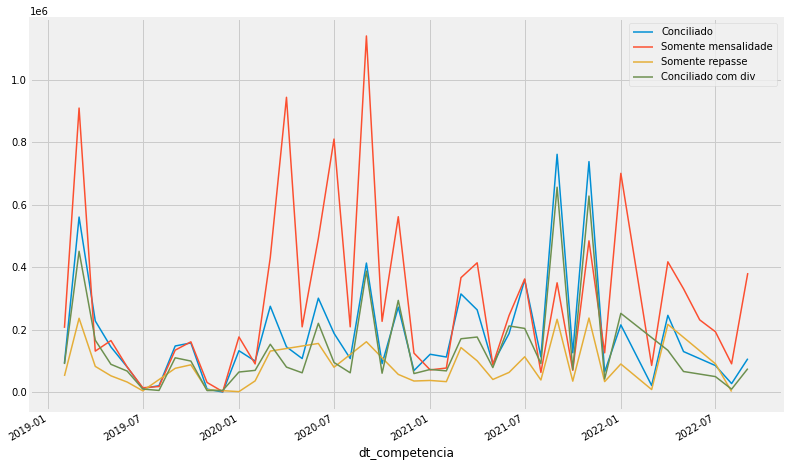

In [ ]:
# Plota os dados
fig, ax = plt.subplots(figsize=(12, 8))
select_conciliado['valor_orig'].plot(ax=ax, label='Conciliado')
select_somente_mensalidade['valor_orig'].plot(ax=ax, label='Somente mensalidade')
select_somente_repasse['valor_orig'].plot(ax=ax, label='Somente repasse')
select_conciliado_com_div['valor_orig'].plot(ax=ax, label='Conciliado com div')
ax.legend();

In [ ]:
select_conciliado = select_conciliado.asfreq('MS')
# Transformando os dados nulos em 0
select_conciliado = select_conciliado.fillna (0)

# Ordenando os index
select_conciliado = select_conciliado.sort_index()

In [ ]:
# Código para verificar se não existem "buracos" nos dados
(select_conciliado.index == pd.date_range(start=select_conciliado.index.min(),
                             end=select_conciliado.index.max(),
                             freq=select_conciliado.index.freq)).all()

True

Train dates : 2019-02-01 00:00:00 --- 2021-09-01 00:00:00  (n=32)
Test dates  : 2021-10-01 00:00:00 --- 2022-09-01 00:00:00  (n=12)


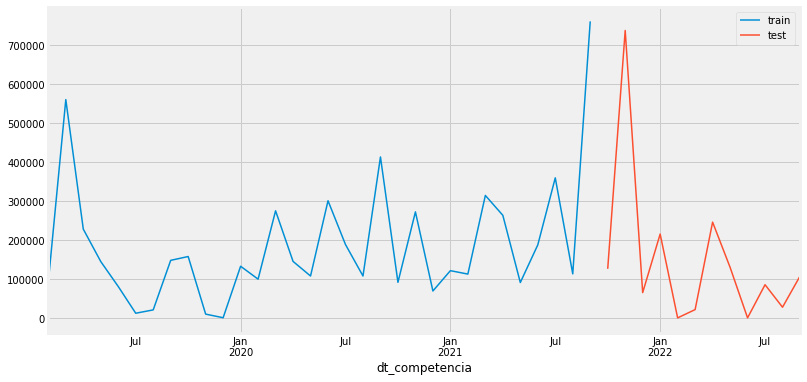

In [ ]:
steps = 12
data_train = select_conciliado[:-steps]
data_test  = select_conciliado[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(12, 6))
data_train['valor_orig'].plot(ax=ax, label='train')
data_test['valor_orig'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
data_train['valor_orig']

dt_competencia
2019-02-01     92531.40
2019-03-01    560615.66
2019-04-01    227996.20
2019-05-01    144651.72
2019-06-01     80560.02
2019-07-01     11929.58
2019-08-01     20484.83
2019-09-01    147779.24
2019-10-01    157584.44
2019-11-01      9648.68
2019-12-01       358.55
2020-01-01    132596.07
2020-02-01     99438.84
2020-03-01    275009.65
2020-04-01    145025.35
2020-05-01    107549.09
2020-06-01    300855.22
2020-07-01    188346.11
2020-08-01    107549.09
2020-09-01    413309.40
2020-10-01     91298.58
2020-11-01    272255.15
2020-12-01     69054.98
2021-01-01    121255.40
2021-02-01    112482.39
2021-03-01    314469.15
2021-04-01    263453.57
2021-05-01     90795.46
2021-06-01    187479.71
2021-07-01    359670.09
2021-08-01    113040.96
2021-09-01    761604.56
Freq: MS, Name: valor_orig, dtype: float64

In [ ]:
# Configura e treina um RandomForestRegressor para série temporal
# Os parâmetros foram retirados do melhor modelo encontrado no material de origem
# Para conseguir os melhores parâmetros se faz necessário realizer hyperparameter tunning (verifique artigo original)
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 4)

forecaster.fit(y=data_train['valor_orig'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123) 
Lags: [1 2 3 4] 
Transformer for y: None 
Transformer for exog: None 
Window size: 4 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2019-02-01 00:00:00'), Timestamp('2021-09-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-11-23 00:06:03 
Last fit date: 2022-11-23 00:06:04 
Skforecast version: 0.5.1 
Python version: 3.7.15 

In [ ]:
# Faz predição no conjunto de teste
steps = 12
predictions = forecaster.predict(steps=steps)
predictions.head(20)

2021-10-01    178495.7774
2021-11-01    439576.6784
2021-12-01    154707.5784
2022-01-01    469795.1428
2022-02-01    154163.3754
2022-03-01    471940.8022
2022-04-01    150099.3720
2022-05-01    471940.8022
2022-06-01    150099.3720
2022-07-01    471940.8022
2022-08-01    150099.3720
2022-09-01    471940.8022
Freq: MS, Name: pred, dtype: float64

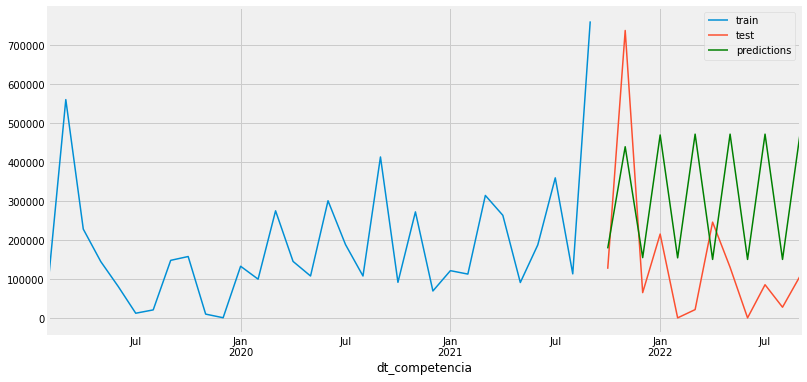

In [ ]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(12, 6))
data_train['valor_orig'].plot(ax=ax, label='train')
data_test['valor_orig'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend();